<a href="https://colab.research.google.com/github/FMDR-YU/r4ds/blob/main/C25Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **25. Many Models**
**Exercise 25.2.5**

2. Explore other methods for visualising the distribution of R2 per continent. You might want to try the ggbeeswarm package, which provides similar methods for avoiding overlaps as jitter, but uses deterministic methods.

Base_size = 18 so I can see axis clearer

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



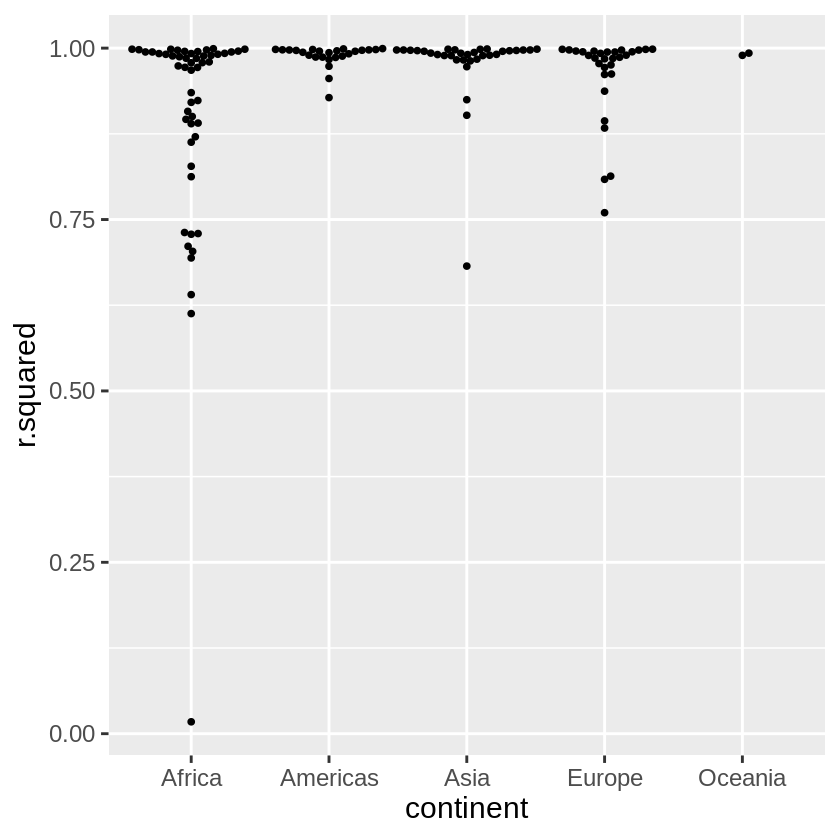

In [23]:
install.packages("gapminder")
install.packages("ggbeeswarm")
library(tidyverse)
library(gapminder)

theme_set(theme_gray(base_size = 18))

country_model <- function(df) {
  lm(lifeExp ~ poly(year - median(year), 2), data = df)
}

by_country <- gapminder %>%
  group_by(country, continent) %>% 
  nest()

by_country <- by_country %>%
  mutate(model = purrr::map(data, country_model))

library("ggbeeswarm")
by_country %>% 
  mutate(glance = purrr::map(model, broom::glance)) %>%
  unnest(glance, .drop = TRUE) %>%
  ggplot(aes(continent, r.squared)) +
geom_beeswarm()

Texts look too small? Use theme_set